<a href="https://colab.research.google.com/github/Edward-Eughene-Timothy/ML-and-DataScience-Practice-Problems/blob/main/MINI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
!pip install pandas scikit-learn

In [40]:
!pip install matplotlib

In [41]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
data=load_iris()

In [43]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df["species"] = data.target

In [44]:
print(df.head(5))
x=df[data.feature_names]
y=df["species"]

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [45]:
df["species"].value_counts()/float(len(df))

,count
species,
0,0.333333
1,0.333333
2,0.333333


In [46]:
train_x,val_x,train_y,val_y=train_test_split(x,y,test_size=0.3,random_state=2)

In [47]:
model=RandomForestClassifier(n_estimators=100,random_state=2)

In [48]:
model.fit(train_x,train_y)
prediction = model.predict(val_x)

In [56]:
num=accuracy_score(prediction,val_y)*100
rounded_num = round(num, 2)
print(f"\n\nAccuracy: {rounded_num}%")
print(f"\n\nConfusion Matrix :\n{confusion_matrix(prediction,val_y)}")
cm=confusion_matrix(prediction,val_y)
print("\n\nclassification_report")
print("\n",classification_report(val_y,prediction))



Accuracy: 97.78%


Confusion Matrix :
[[17  0  0]
 [ 0 14  0]
 [ 0  1 13]]


classification_report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.93      0.97        15
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



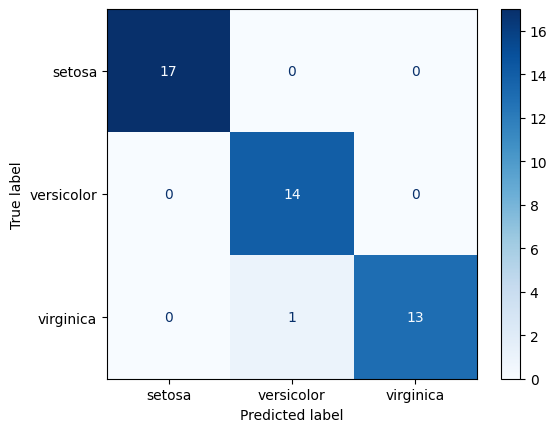

In [50]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap='Blues')
plt.show()

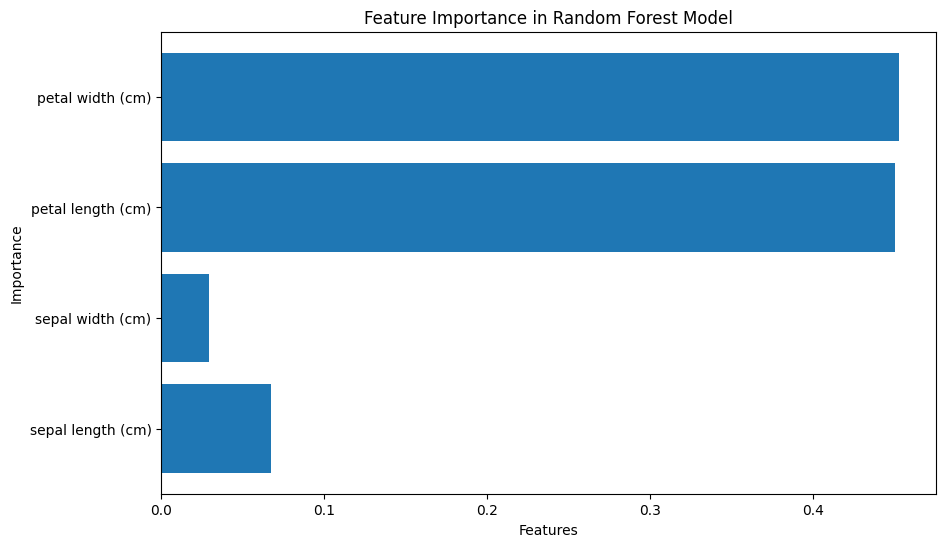

In [51]:
plt.figure(figsize=(10, 6))
plt.barh(data.feature_names, model.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.show()